In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
cd ../

D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5


In [3]:
run start_template.py

<IPython.core.display.Javascript object>


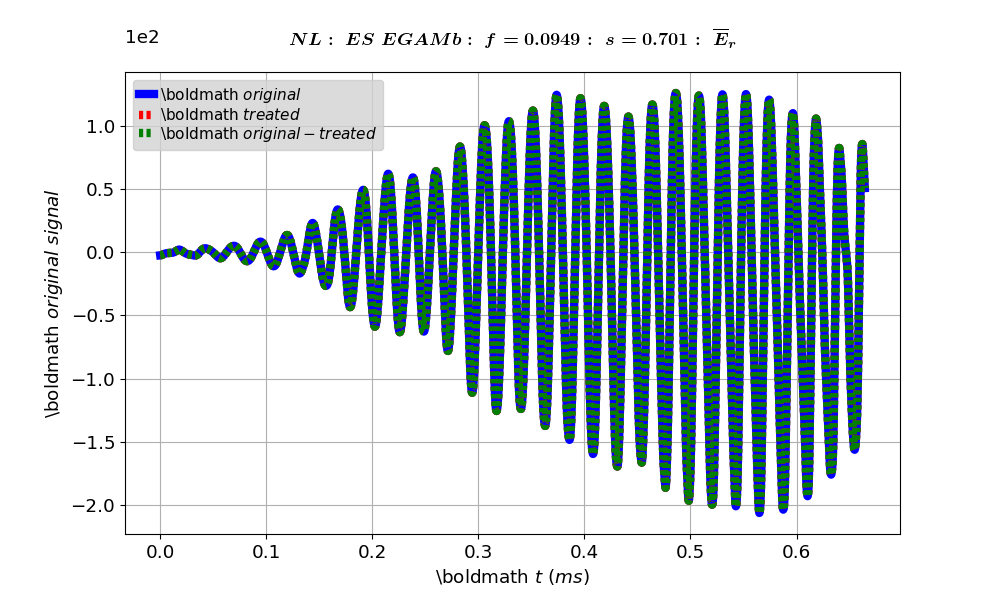

<IPython.core.display.Javascript object>


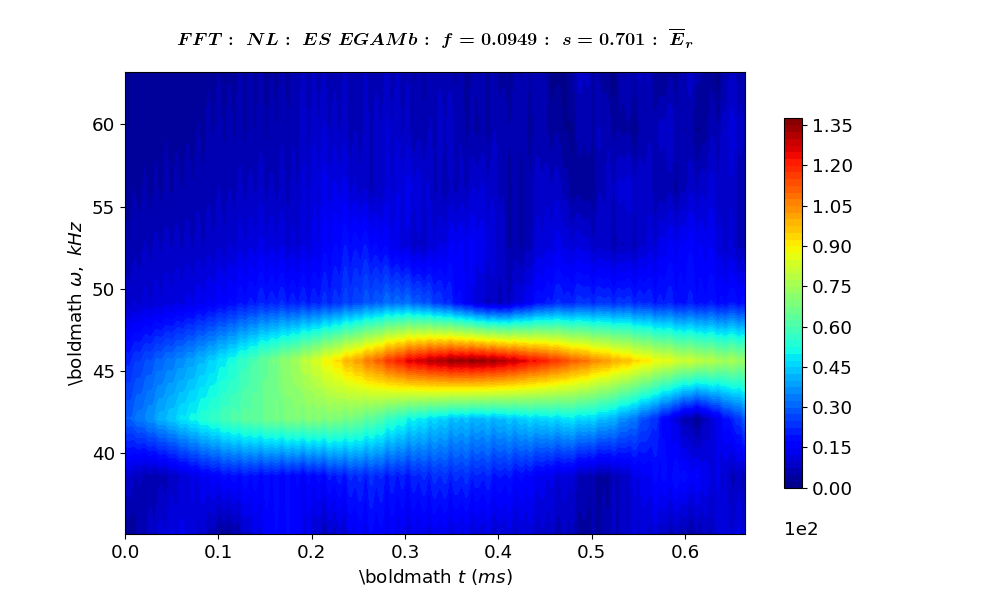

In [56]:
# *************************************************************************
# *** FFT in time ***
# *************************************************************************
reload()

# signal
dd_one = nb025_f009_orig
s_point = 0.70
ch_signals = GLO.create_signals_dds(
    GLO.def_erbar_ts, 
    [dd_one], 
    domains = [s_point],
)

# styling:
ff = dict(GLO.DEF_PLOT_FORMAT)
ff['ylabel-w'] = '\omega'


# post-processing
pps_var1 = [{'operation': 'mult', 'coef': 0.2e5}]
pps_var2 = [{'operation': 'integration-accumulation', 'width': 5268.358, 'domain': [0.0e5, 2.0e5]}]
postprocessing = [pps_var1, pps_var2]

# plotting
oo = {
    'signals': ch_signals,
    'ff': ff,
#     'oo_postprocessing': postprocessing,
    'sel_norm_x': 't-ms',
    'sel_norm_w': 'khz',
    'width_x': 3.0e4,
    'x_fft_domain': [0.0, 1.0e5],
    'w_norm_domain': [35, 65],
}

common.fft_in_time(oo)